In [1]:
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']


Bad key text.latex.preview in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       

<AxesSubplot:>

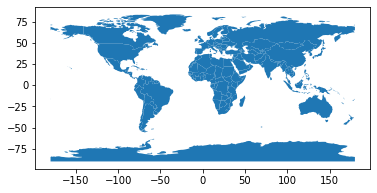

In [2]:
df.plot()

<AxesSubplot:>

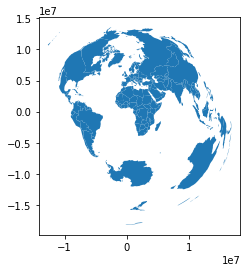

In [3]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

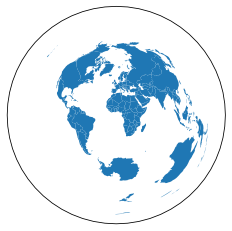

In [4]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'], crs=crs)

<GeoAxesSubplot:>

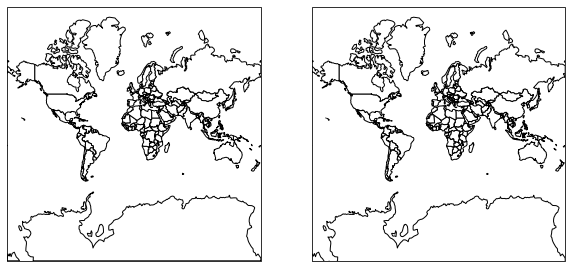

In [5]:
crs_epsg = ccrs.epsg('3857')
df_epsg = df.to_crs(epsg='3857')

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': crs_epsg},
                        figsize=(10, 5))
# Make the CartoPy plot
axs[0].add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='white', edgecolor='black')
# Make the GeoPandas plot
df_epsg.plot(ax=axs[1], color='white', edgecolor='black')

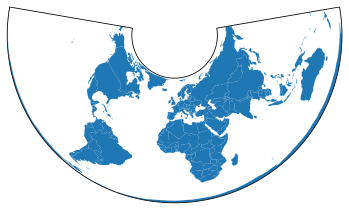

In [6]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [crs_new.project_geometry(ii, src_crs=crs)
                  for ii in df_ae['geometry'].values]

fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

<AxesSubplot:>

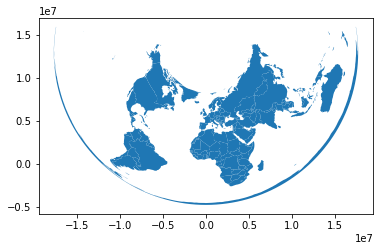

In [7]:
df_aea = geopandas.GeoDataFrame(df['gdp_pp'], geometry=new_geometries,
                                crs=crs_new.proj4_init)
df_aea.plot()

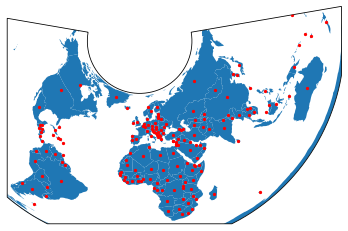

In [8]:
# Generate a CartoPy figure and add the countries to it
fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

# Calculate centroids and plot
df_aea_centroids = df_aea.geometry.centroid
# Need to provide "zorder" to ensure the points are plotted above the polygons
df_aea_centroids.plot(ax=ax, markersize=5, color='r', zorder=10)

plt.show()